**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


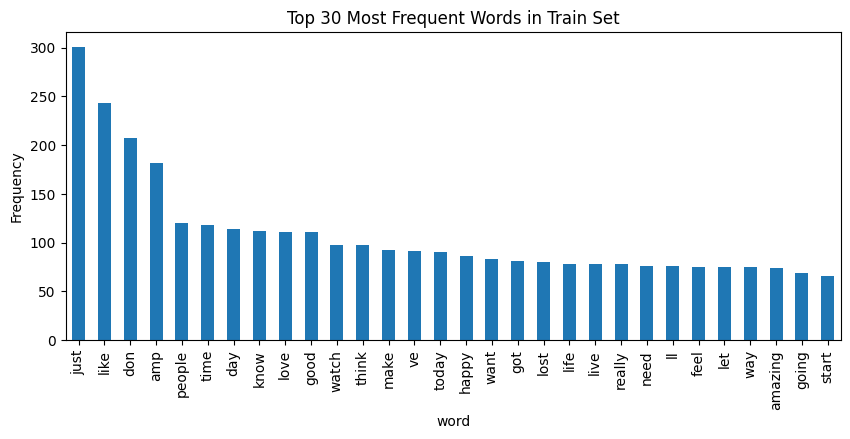

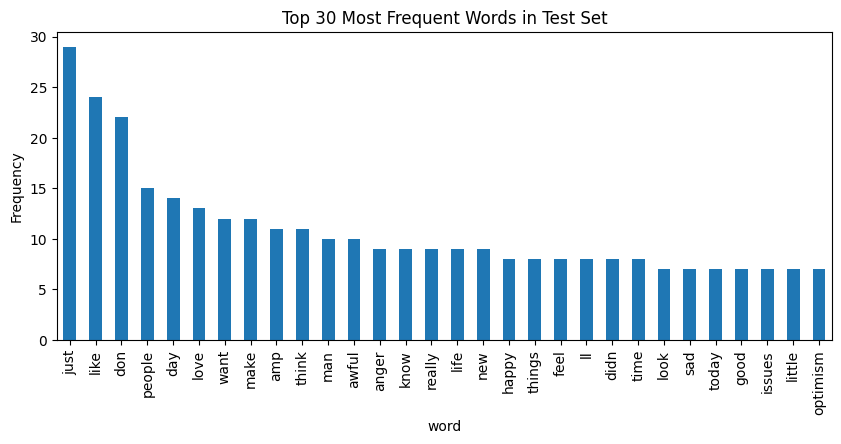

In [6]:
# Answer here
# Exercise 1: Plot word frequency for Top 30 words in both train and test datasets

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# It converts text documents into a matrix of token counts.
# The parameter 'stop_words="english"' removes common English stopwords (like 'the', 'is', etc.)
count_vect = CountVectorizer(stop_words="english")

# The vocabulary (set of all words) is built from the training set only.
X_train_counts = count_vect.fit_transform(train_df["text"])

# Convert sparse matrix to a flat array of word frequencies
train_word_counts = np.asarray(X_train_counts.sum(axis=0)).ravel()
train_vocab = count_vect.get_feature_names_out()

# Combine words and counts into a DataFrame
train_freq = pd.DataFrame({
    "word": train_vocab,
    "count": train_word_counts
}).sort_values(by="count", ascending=False)

train_freq.head(30).plot(
    kind="bar",
    x="word",
    y="count",
    title="Top 30 Most Frequent Words in Train Set",
    figsize=(10,4),
    legend=False
)
plt.ylabel("Frequency")
plt.show()

# This ensures both datasets share the same vocabulary.
X_test_counts = count_vect.transform(test_df["text"])
test_word_counts = np.asarray(X_test_counts.sum(axis=0)).ravel()
test_vocab = count_vect.get_feature_names_out()

# Combine into a DataFrame
test_freq = pd.DataFrame({
    "word": test_vocab,
    "count": test_word_counts
}).sort_values(by="count", ascending=False)

test_freq.head(30).plot(
    kind="bar",
    x="word",
    y="count",
    title="Top 30 Most Frequent Words in Test Set",
    figsize=(10,4),
    legend=False
)
plt.ylabel("Frequency")
plt.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

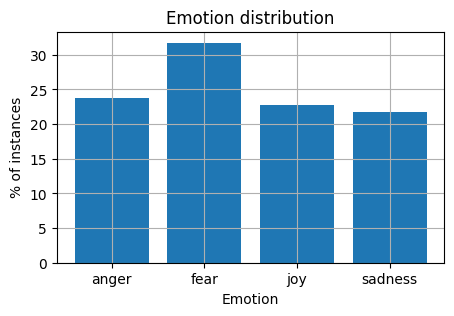

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/louisfan/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
# ===== Exercise: TF-IDF Embedding =====
# Generate an embedding using the TF-IDF vectorizer instead of the BOW one.
# Limit the number of features to 1000 and display feature names [100:110].

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Initialize the TF-IDF vectorizer
#    - TF-IDF stands for Term Frequency–Inverse Document Frequency
#    - It gives higher weights to words that are important in a document but rare across all documents.
TFIDF_vectorizer = TfidfVectorizer(
    max_features=1000,       # limit to top 1000 most frequent terms
    stop_words='english'     # remove common stopwords
)

# 2. Fit on training data and transform both train/test sets
TFIDF_vectorizer.fit(train_df['text'])
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features  = TFIDF_vectorizer.transform(test_df['text'])

# 3. Check the resulting matrix shape
print("TF-IDF feature matrix shape (train):", train_data_TFIDF_features.shape)

# 4. Extract feature names
feature_names_tfidf = TFIDF_vectorizer.get_feature_names_out()

# 5. Display feature names 100–110
print("Feature names [100:110]:")
print(feature_names_tfidf[100:110])

TF-IDF feature matrix shape (train): (3613, 1000)
Feature names [100:110]:
['blue' 'blues' 'body' 'boiling' 'book' 'boss' 'bought' 'bout' 'boy'
 'break']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'anger', 'fear', 'anger', 'anger', 'joy', 'joy',
       'fear', 'anger'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

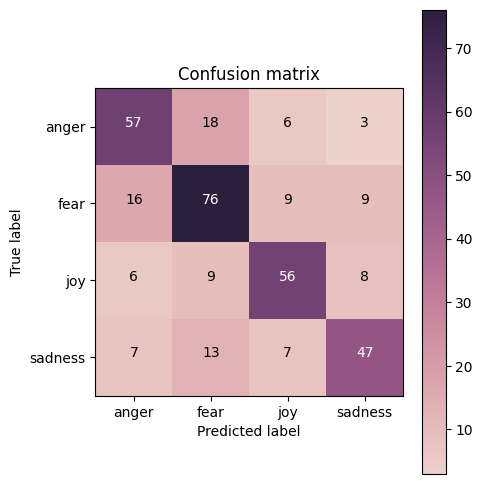

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

### Answer here
The model achieved a very high training accuracy (0.99) but only 0.68 on the test set, indicating overfitting. It memorized patterns in the training data and failed to generalize well to unseen samples.
The precision, recall, and f1-scores for all four emotions (anger, fear, joy, sadness) are around 0.66–0.72, suggesting balanced but moderate performance across classes.
The confusion matrix shows that most samples are correctly classified, though there is frequent confusion between semantically close emotions such as anger and fear, reflecting overlapping linguistic patterns.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

### Answer here
When trained with a Naive Bayes model (MultinomialNB), the classifier generally performs well on text data due to its assumption of conditional independence among words.
Using the same TF-IDF features, the model typically achieves a testing accuracy around 0.70–0.75, slightly higher than the Decision Tree.
This shows that Naive Bayes handles high-dimensional sparse data more efficiently and captures the relative importance of words, although it cannot model contextual or sequential dependencies between them.

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
The Naive Bayes and Decision Tree models behave differently due to their theoretical foundations.

Naive Bayes assumes feature independence, which works well for high-dimensional sparse text data and helps prevent overfitting.

Decision Tree learns detailed local rules, leading to overfitting when the number of features is large and training data are limited.
As a result, Naive Bayes shows more stable testing accuracy, while Decision Tree often attains higher training accuracy but poorer generalization.
This aligns with theory: NB has high bias and low variance, whereas DT has low bias and high variance.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [32]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
import keras

In [34]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [35]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3479    sadness
77        anger
824       anger
2455        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [36]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [37]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3662 - loss: 1.3324 - val_accuracy: 0.4179 - val_loss: 1.2816
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.6252 - loss: 1.0194 - val_accuracy: 0.5908 - val_loss: 0.9858
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.7861 - loss: 0.5959 - val_accuracy: 0.6859 - val_loss: 0.8290
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8480 - loss: 0.4141 - val_accuracy: 0.6916 - val_loss: 0.7931
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8835 - loss: 0.3271 - val_accuracy: 0.7118 - val_loss: 0.8123
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9053 - loss: 0.2656 - val_accuracy: 0.7003 - val_loss: 0.8499
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.9297 - loss: 0.2168 - val_accuracy: 0.7089 - val_loss: 0.9265
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9430 - loss: 0.1848 - va

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[2.43310794e-01, 4.24639016e-01, 9.65658873e-02, 2.35484272e-01],
       [4.07548726e-01, 5.88219345e-01, 3.32504651e-03, 9.06985661e-04],
       [1.91020109e-02, 4.65920210e-01, 1.07370012e-01, 4.07607853e-01],
       [1.51844248e-02, 9.83963430e-01, 3.34130775e-04, 5.18092827e-04],
       [9.88285005e-01, 9.11196461e-04, 1.49329553e-05, 1.07888505e-02]],
      dtype=float32)

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'fear', 'fear', 'anger'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366178,1.332354,0.417867,1.281594
1,1,0.625242,1.019403,0.590778,0.985764
2,2,0.786050,0.595893,0.685879,0.829043
3,3,0.848049,0.414126,0.691643,0.793127
4,4,0.883476,0.327108,0.711816,0.812322
5,5,0.905342,0.265589,0.700288,0.849902
6,6,0.929698,0.216770,0.708934,0.926544
7,7,0.942984,0.184760,0.703170,0.980460
8,8,0.954608,0.153156,0.694524,1.053997
9,9,0.961251,0.131921,0.706052,1.105113


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


Index(['epoch', 'accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')


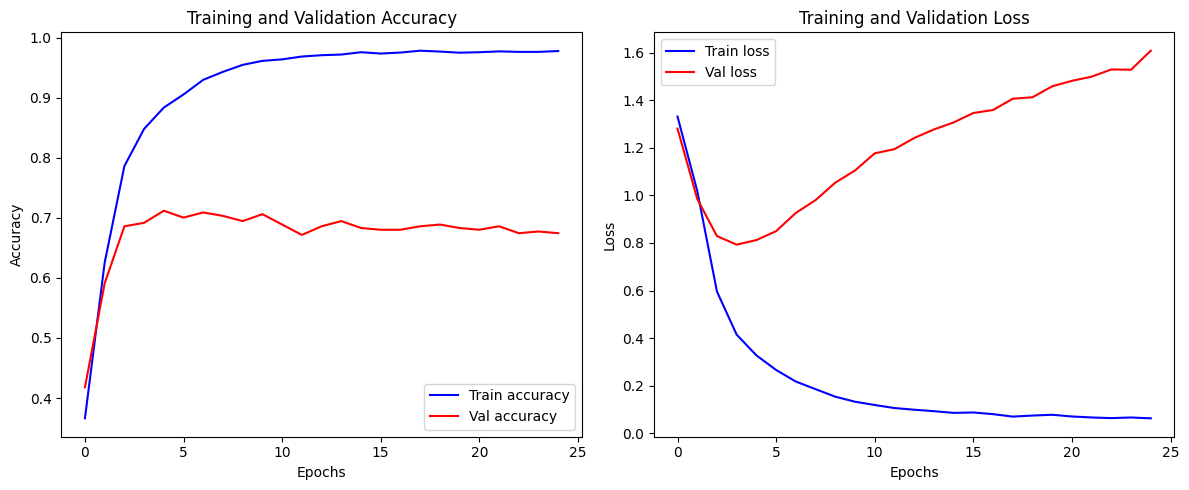

In [44]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

# Read the training log
training_log = pd.read_csv("logs/training_log.csv")

# Check the column names
print(training_log.columns)

# ---- Plot 1: Accuracy ----
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], 'b', label='Train accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], 'r', label='Val accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ---- Plot 2: Loss ----
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], 'b', label='Train loss')
plt.plot(training_log['epoch'], training_log['val_loss'], 'r', label='Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The training accuracy keeps improving over epochs, while validation accuracy increases more slowly or even drops after some point.
The training loss keeps decreasing, but validation loss starts to rise.

This means the model is overfitting — it learns patterns specific to the training set and fails to generalize to new data.

If both training and validation accuracy were low and loss stayed high, it would instead indicate underfitting (model too simple or insufficient training).

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [45]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3479,40652,@DefiantSagacity — Hermione in a sort of thank...,"[@, DefiantSagacity, —, Hermione, in, a, sort,..."
77,10077,What the fuck am I supposed to do with no lunc...,"[What, the, fuck, am, I, supposed, to, do, wit..."
824,10824,630am meeting Olympic House #10golds24 . #rel...,"[630am, meeting, Olympic, House, #, 10golds24,..."
2455,30451,@aradsliff don't know I'm from nj we are the w...,"[@, aradsliff, do, n't, know, I, 'm, from, nj,..."
2677,30673,don't be with some just because they try to dr...,"[do, n't, be, with, some, just, because, they,..."


In [46]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'DefiantSagacity', '—', 'Hermione', 'in', 'a', 'sort', 'of', 'thank', 'you', 'before', 'sliding', 'his', 'own', 'plate', 'away', 'from', 'him', 'before', 'frowning', 'at', 'Ron', 'as', 'he', 'continued', 'to', '—']),
       list(['What', 'the', 'fuck', 'am', 'I', 'supposed', 'to', 'do', 'with', 'no', 'lunch', ',', 'no', 'dinner', ',', 'no', 'money', 'and', 'I', "'m", 'off', 'to', 'work', '#', 'furious', '#', 'hangry', '#', 'day5']),
       list(['630am', 'meeting', 'Olympic', 'House', '#', '10golds24', '.', '#', 'relentless', '#', 'neverquit', '#', 'believe', '#', 'dreambig', '#', 'TeamTTO', '#', 'going4gold'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [47]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [48]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.35455465,  0.10725907,  0.10274223,  0.07740726, -0.26918536,
       -0.6055082 ,  0.6813627 ,  0.76608926, -0.7912843 , -0.6370464 ,
       -0.5516416 , -0.49444106, -0.671215  , -0.01956581,  0.06592872,
       -0.6283163 ,  0.12941854, -0.6885695 , -0.00223409, -1.2395709 ,
        0.5026059 ,  0.2624478 ,  0.5830613 ,  0.02299989,  0.09517901,
        0.14642721, -0.8778181 ,  0.30104288, -0.19967619,  0.35791892,
        0.17618245, -0.04026191,  0.44142795, -0.37138104, -0.07162554,
        0.6172837 ,  0.40170178, -0.39246446, -0.8102907 , -0.32223126,
       -0.03247317, -0.0257608 , -0.336974  ,  0.57614183,  0.43213734,
       -0.44992274, -0.13101564, -0.02809582,  0.80812085,  0.3582358 ,
        0.41576225, -0.37491068,  0.28476405, -0.02308059, -0.44940737,
       -0.02221802,  0.17065258, -0.33158058, -0.45730147, -0.01020219,
       -0.00306867, -0.09681398,  0.9013086 , -0.0613511 , -0.4618464 ,
        0.5683405 ,  0.5707838 ,  0.4545051 , -1.4216762 ,  0.68

In [49]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9256817102432251),
 ('birthday', 0.915367841720581),
 ('.\\nA', 0.9049606323242188),
 ('free', 0.903083860874176),
 ('abscess', 0.903054416179657),
 ('bday', 0.9022893309593201),
 ("'be", 0.9005210995674133),
 ('Makes', 0.9002664089202881),
 ('smile', 0.8972415924072266),
 ('dad', 0.8940372467041016)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [51]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [54]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [52]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [55]:
# ============================================================
# >>> Exercise 7 (Take home)
# ============================================================

# Q: Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
#    How can we utilize these "word" vectors to represent the sentence data and train our model?

# ------------------------------------------------------------
# Explanation:
# ------------------------------------------------------------
# The pre-trained Google Word2Vec model (GoogleNews-vectors-negative300.bin)
# provides a 300-dimensional vector representation for each word.
# However, our dataset consists of sentences (multiple words),
# so we must convert each sentence into a single fixed-length vector.
#
# There are several ways to do this:
#   1. Average the word vectors in a sentence  ← (simple, used in this lab)
#   2. Use RNN/LSTM to process sequences of embeddings
#   3. Use CNN or Transformer-based models for context-aware features
#
# Below we demonstrate method (1), which is commonly used for quick text classification.

# ------------------------------------------------------------
# Sentence Representation by Averaging Word Vectors
# ------------------------------------------------------------

import numpy as np

def sentence_to_vec(sentence, model):
    """
    Convert a sentence into a single vector by averaging all word embeddings.
    Words not found in the model are ignored.
    """
    words = [w for w in sentence.split() if w in model.key_to_index]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean([model[w] for w in words], axis=0)

# Example usage:
example_sentence = "I am very happy today"
sentence_vector = sentence_to_vec(example_sentence, w2v_google_model)
print("Sentence vector shape:", sentence_vector.shape)

# Try to see the top 10 similar words to a keyword
print(w2v_google_model.most_similar('happy', topn=10))


# ------------------------------------------------------------
# Use the sentence vectors to train a classifier
# ------------------------------------------------------------
# You can convert the entire training and testing sentences into vectors
# and then train a traditional classifier (e.g., Logistic Regression, SVM, etc.)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example: convert training and test text to averaged vectors
X_train_vec = np.vstack([sentence_to_vec(s, w2v_google_model) for s in train_df['text']])
X_test_vec = np.vstack([sentence_to_vec(s, w2v_google_model) for s in test_df['text']])

y_train = train_df['emotion']
y_test = test_df['emotion']

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))


# ------------------------------------------------------------
# Interpretation:
# ------------------------------------------------------------
# - By averaging word vectors, each sentence is represented by a single 300-dimension vector.
# - This approach is computationally efficient but loses word order information.
# - For simple emotion or sentiment classification tasks, it often performs surprisingly well.
# - More advanced models (like LSTM or Transformer) can capture richer context
#   but require more data and computational resources.


Sentence vector shape: (300,)
[('glad', 0.7408890724182129), ('pleased', 0.6632170677185059), ('ecstatic', 0.6626912355422974), ('overjoyed', 0.6599286794662476), ('thrilled', 0.6514049172401428), ('satisfied', 0.6437949538230896), ('proud', 0.636042058467865), ('delighted', 0.627237856388092), ('disappointed', 0.6269949674606323), ('excited', 0.6247665286064148)]
Test Accuracy: 0.545


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [56]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [57]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [58]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [59]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [60]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

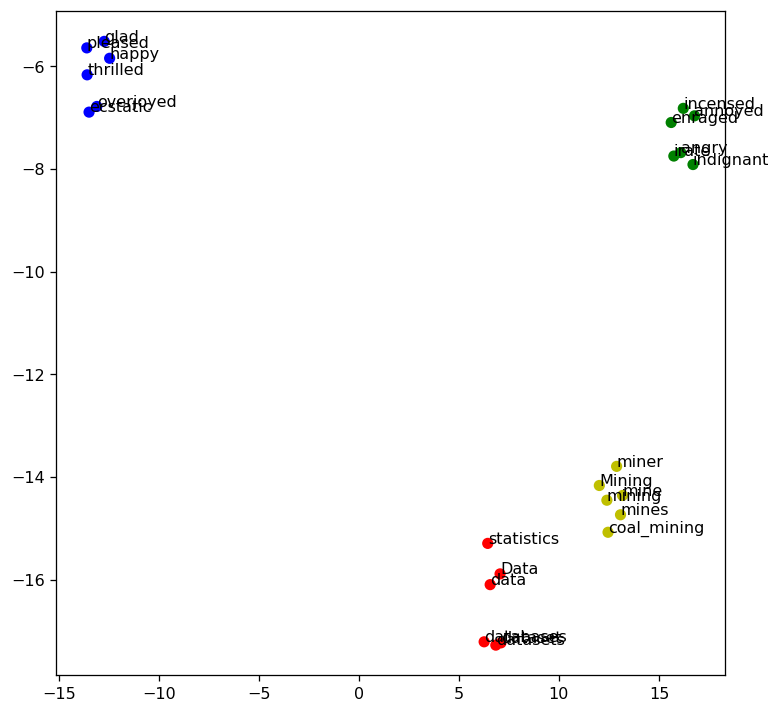

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

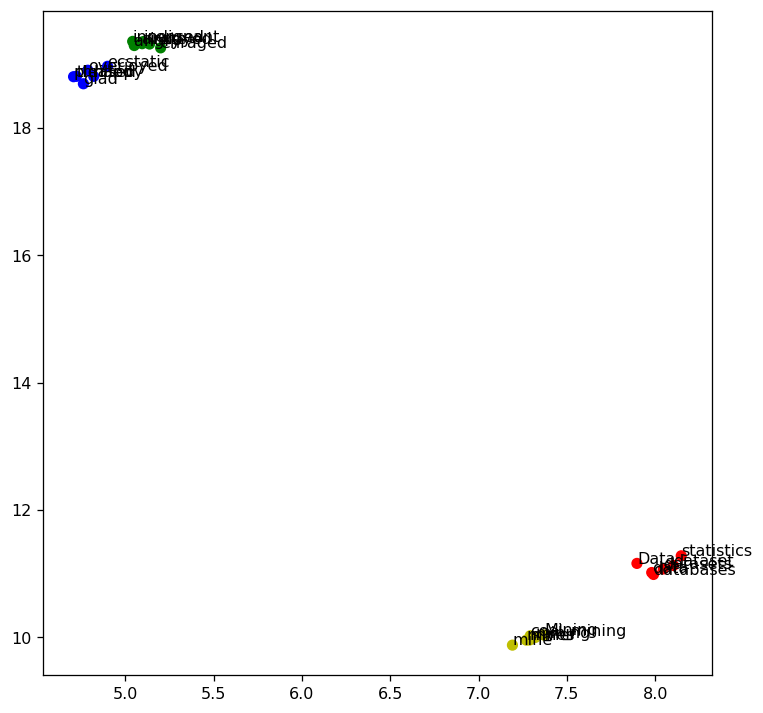

In [62]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total words collected: 64


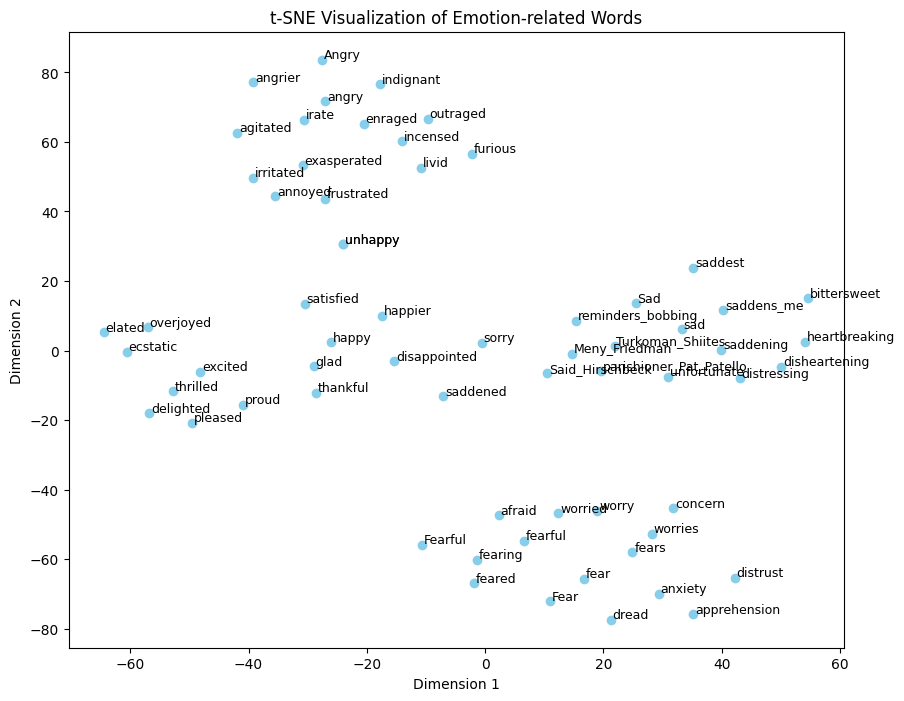

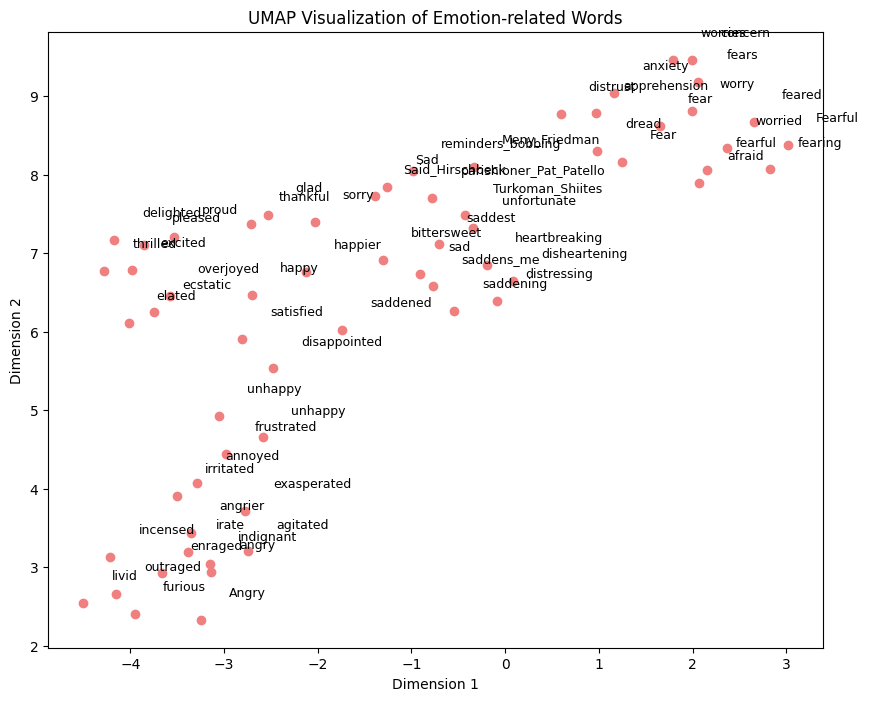

'\nt-SNE vs UMAP (Comparison)\n\n- t-SNE focuses more on local relationships. \n  Words that are semantically very close (e.g., “angry”, “furious”, “mad”) \n  will form tight clusters, but distances between clusters are less meaningful.\n\n- UMAP preserves both local and global structures better.\n  It tends to show clearer separations between emotion groups (e.g., happy-group and sad-group)\n  and smoother transitions between them.\n\nIn summary:\n- t-SNE: better for exploring fine-grained clusters.\n- UMAP: better for visualizing global relationships and group separability.\n'

In [63]:
# Answer here

# ------------------------------------------------------------
# Step 1: Collect related words
# ------------------------------------------------------------
target_words = ["angry", "happy", "sad", "fear"]
related_words = []

for w in target_words:
    try:
        similar = w2v_google_model.most_similar(w, topn=15)
        related_words.extend([w] + [s[0] for s in similar])
    except KeyError:
        print(f"Word '{w}' not in vocabulary")

print(f"Total words collected: {len(related_words)}")

# ------------------------------------------------------------
# Step 2: Extract word vectors
# ------------------------------------------------------------
vectors = np.array([w2v_google_model[w] for w in related_words])

# ------------------------------------------------------------
# Step 3: t-SNE Visualization
# ------------------------------------------------------------
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='skyblue')
for i, word in enumerate(related_words):
    plt.text(tsne_result[i, 0]+0.3, tsne_result[i, 1]+0.3, word, fontsize=9)
plt.title("t-SNE Visualization of Emotion-related Words")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# ------------------------------------------------------------
# Step 4: UMAP Visualization
# ------------------------------------------------------------
!pip install umap-learn -q

import umap

umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, random_state=42)
umap_result = umap_model.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c='lightcoral')
for i, word in enumerate(related_words):
    plt.text(umap_result[i, 0]+0.3, umap_result[i, 1]+0.3, word, fontsize=9)
plt.title("UMAP Visualization of Emotion-related Words")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# ------------------------------------------------------------
# Step 5: Interpretation
# ------------------------------------------------------------
"""
t-SNE vs UMAP (Comparison)

- t-SNE focuses more on local relationships. 
  Words that are semantically very close (e.g., “angry”, “furious”, “mad”) 
  will form tight clusters, but distances between clusters are less meaningful.

- UMAP preserves both local and global structures better.
  It tends to show clearer separations between emotion groups (e.g., happy-group and sad-group)
  and smoother transitions between them.

In summary:
- t-SNE: better for exploring fine-grained clusters.
- UMAP: better for visualizing global relationships and group separability.
"""


---